# 주성분 분석

# Principal Component Analysis (PCA)

* 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터 셋을 회전시키는 방법
* 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됨

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

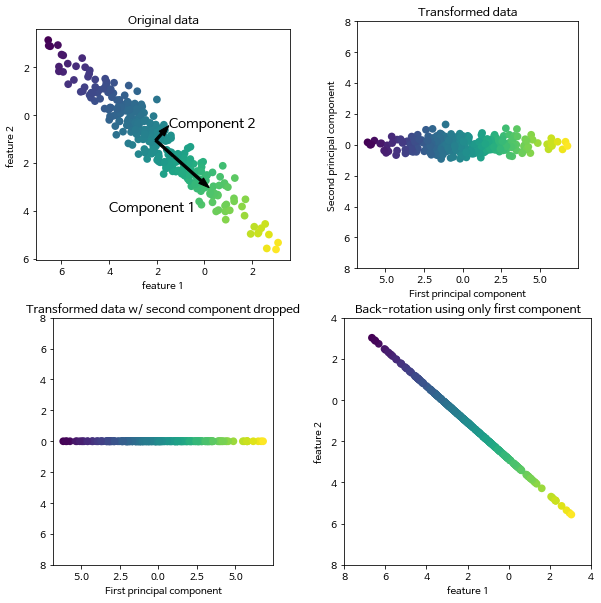

In [2]:
mglearn.plots.plot_pca_illustration()

## 1. PCA 알고리즘

### Step 1.
* 위의 그래프 중 첫 번째 그래프는(왼쪽 위) 원 데이터(original data)의 그래프이며, *"Component 1"* 이라고 쓰여있는, 분산이 가장 큰 방향을 찾는다.
* *Component 1*의 방향(또는 벡터)은 데이터에서 가장 많은 정보를 담고 있는 방향이며, 특성들의 상관관계가 가장 큰 방향이다.

### Step 2.
* 그 다음, 첫 번째 방향, 즉 *Component 1*과 직각인 방향 중에서 가장 많은 정보를 담고있는(두 번째로 분산이 큰) 방향을 찾는다.
* **Step1, 2**의 과정을 거쳐 찾은 방향을 데이터의 주된 분산의 방향이라고 해서 **주성분(Principal Component)**라고 한다.

## 2. sklearn.decomposition.[PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

*class* `sklearn.decomposition.PCA`(*n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None*)

### parameters
* **n_components**: int, float, None or string
    * 선택할 주성분(PC) 개수를 설정
    * default는 None이며, 모든 성분(component)가 선택된다(남는다).
    * 자세한건 링크 참고

* **whiten**: bool, optional (default False)
    * 각 Feature 간 <br/>
    1) 서로 **작은 상관관계**(correlation)을 가지도록 해줌 <br />
    2) **동일한 분산**(variance)를 가지도록 해줌

* **svd_solver**: string{'auto', 'full', 'arpack', 'randomized'}
    * SVD(Singular Value Decomposition) 특이값 분해 방법을 설정

### Attributes
* **components_** : array, shape (n_components, n_features)
    * eigenvector를 출력해줌
    * 각 행은 주성분 하나씩을 나타내며 중요도 순으로 정려되어 있다. 열은 original 데이터의 특성(feature)을 나타낸다.
    * Principal axes in feature space, representing the directions of maximum variance in the data. 

* **explained\_variance_**: array, shape (n_components,)
    * eigenvalue를 출력해줌
    * The amount of variance explained by each of the selected components.
    Equal to n_components largest eigenvalues of the covariance matrix of X

* **explained\_variance\_ratio\_**: array, shape (n_components,)
    * 주성분(PC)의 설명력을 출력해줌
    * Percentage of variance explained by each of the selected components.

* **singular\_values\_**: array, shape (n_components,)
    * The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the `n_components` variables in the lower-dimensional space.

### Methods
* **transform**(X): Apply dimensionality reduction to X.
* **inverse_transform**(X): Transform data back to its original space.(PCA 적용 후 원래의 공간으로 되돌리기)

### PCA examples

In [3]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print('설명력: ',pca.explained_variance_ratio_)  
print('특이값: ',pca.singular_values_)
print('고유값: ', pca.explained_variance_)
print('고유 벡터:\n',pca.components_)

from numpy import linalg as LA

ev, eig = LA.eig(np.cov(X.T))
print('\n===Numpy로 구한 고유값과 고유벡터===')
print('고유값: ',ev)
print('고유벡터:\n',eig)

설명력:  [ 0.99244289  0.00755711]
특이값:  [ 6.30061232  0.54980396]
고유값:  [ 7.93954312  0.06045688]
고유 벡터:
 [[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]

===Numpy로 구한 고유값과 고유벡터===
고유값:  [ 7.93954312  0.06045688]
고유벡터:
 [[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


## 2. PCA를 적용해 유방암 데이터셋 시각화하기
* PCA가 가장 많이 사용되는 분야는 고차원 데이터셋의 시각화이다.
* 데이터의 차원(특성)이 많아지면 데이터를 시각화 하는것은 어려운일이다.
* PCA를 이용하면 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 파악할 수 있다.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# PCA를 적용하기 전에 데이터를 스케일링 해준다.
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 선택
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델생성
# pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.fit_transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


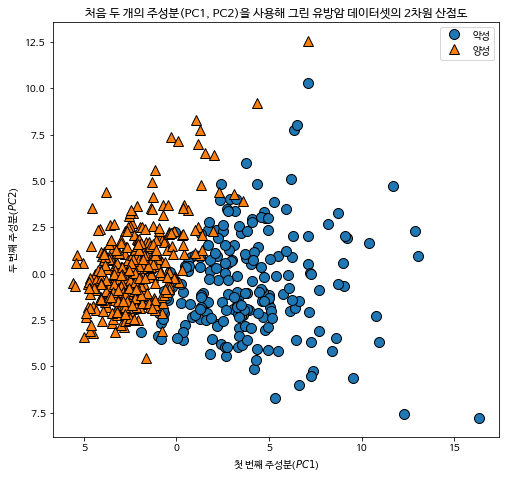

In [7]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분($PC1$)")
plt.ylabel("두 번째 주성분($PC2$)")
plt.title('처음 두 개의 주성분(PC1, PC2)을 사용해 그린 유방암 데이터셋의 2차원 산점도')

* PCA의 **단점**은 위의 그래프처럼 두 축, 즉 주성분 PC1과 PC2를 해석하기가 어렵다.
* 주성분은 원래의 데이터(Original data)에 있는 어떤 방향에 대응하는 여러 특성(feature)가 조합된 형태이다.

In [8]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


* `pca.components_` 의 각 **행**은 *주성분* 하나씩을 나타내며 중요도 순으로 정렬되어 있다. **열**은 original 데이터의 *특성(feature)*을 나타낸다. 

In [11]:
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


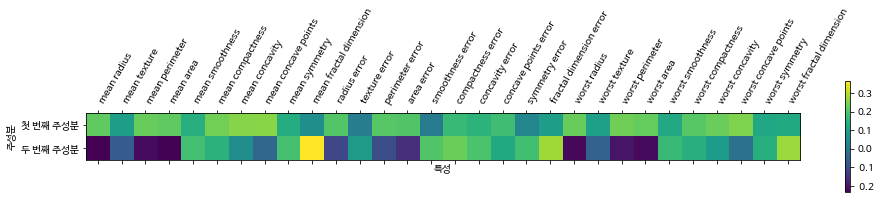

In [10]:
# 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

* 위의 그림에서 첫번째 주성분(PC1)의 모든 feature의 부호(+/-)가 같다. 즉, 모든 *특성 사이에 공통의 상호관계가 있다는 뜻*이다.(한 특성의 값이 커지면 다른 특성들의 값 또한 커짐)
* 두번째 주성분(PC2)은 부호가 섞여있으므로 축이 가지는 의미를 설명하기 쉽지 않다.

### 2.1 matplotlib.mlab.[PCA](https://matplotlib.org/api/mlab_api.html) 로 그래프 그리기

In [19]:
from matplotlib.mlab import PCA as mlabPCA
from scipy import ndimage

mlab_pca = mlabPCA(X_scaled)

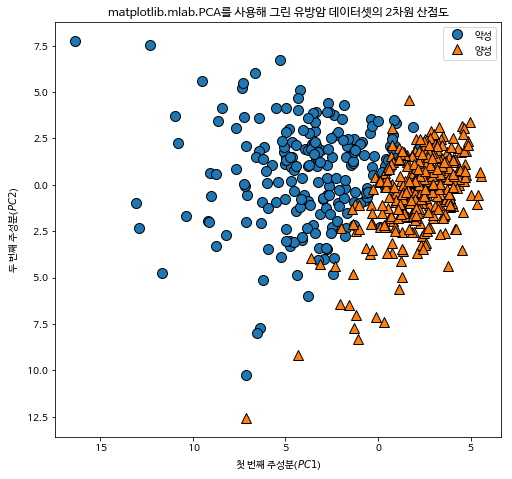

In [22]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(mlab_pca.Y[:, 0], mlab_pca.Y[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분($PC1$)")
plt.ylabel("두 번째 주성분($PC2$)")

plt.title('matplotlib.mlab.PCA를 사용해 그린 유방암 데이터셋의 2차원 산점도')

## 3. 고유얼굴(eigenface) 특성 추출

* PCA는 **특성 추출**(feature extraction)에도 이용한다.
* 특성 추출은 '원본 데이터(original data) 표현보다 분석하기에 더 적합한 표현을 찾을 수 있을거야'라는 생각에서 출발한다.
* 이미지에서 특성 추출은 데이터를 분석하는데 도움이 될 수 있음

### 3.1 LFW(Labeled Faces in the Wild) 데이터 셋
* LFW 데이터는 [매사추세츠 애머스트 주립대학교의 비전랩](http://vis-www.cs.umass.edu/lfw)에서 만든 데이터
* 이 데이터셋은 인터넷에서 유명 인사들의 얼굴 이미지들로 2000년 초반 이후의 정치인, 가수, 배우 운동선수 등의 얼굴을 포함

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54]),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'], 
       dtype='<U25'))

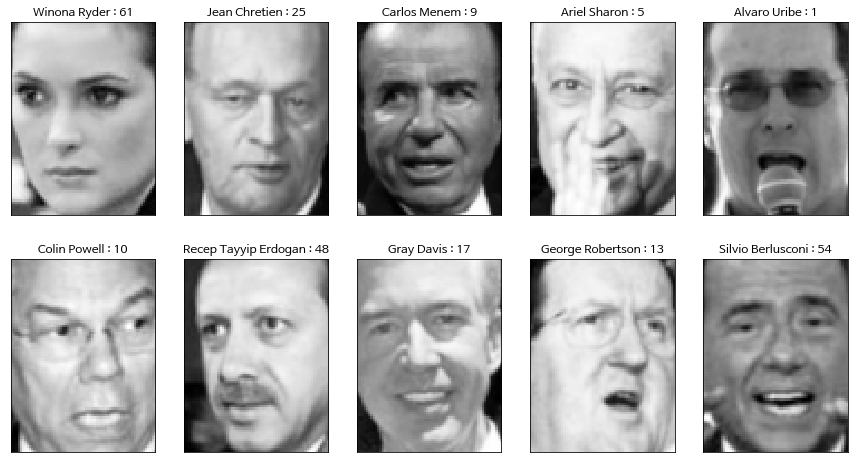

In [79]:
# LFW 데이터셋은 http://vis-www.cs.umass.edu/lfw 참고
# 시간이 조금 소요됨
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap="Greys_r") # cmap="Greys_r"을 해줘야지 흑백으로 나옴
    ax.set_title('{0} : {1}'.format(people.target_names[target],target))
people.target[0:10], people.target_names[people.target[0:10]]

* LFW 데이터셋에는 62명의 얼굴 이미지가 총 3,023개 있으며, 이미지의 크기는 87 x 65 픽셀이다.

In [80]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


* 데이터에서 알 수 있듯이 조지 부시<sup>George W Bush</sup>와 콜린 파월<sup>Colin Powell</sup>의 이미지가 많다. 

In [81]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(sorted(zip(counts, people.target_names), reverse=True)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

George W Bush             530   Colin Powell              236   Tony Blair                144   
Donald Rumsfeld           121   Gerhard Schroeder         109   Ariel Sharon               77   
Hugo Chavez                71   Junichiro Koizumi          60   Jean Chretien              55   
John Ashcroft              53   Serena Williams            52   Jacques Chirac             52   
Vladimir Putin             49   Luiz Inacio Lula da Silva  48   Gloria Macapagal Arroyo    44   
Jennifer Capriati          42   Arnold Schwarzenegger      42   Lleyton Hewitt             41   
Laura Bush                 41   Hans Blix                  39   Alejandro Toledo           39   
Nestor Kirchner            37   Andre Agassi               36   Alvaro Uribe               35   
Tom Ridge                  33   Silvio Berlusconi          33   Megawati Sukarnoputri      33   
Vicente Fox                32   Roh Moo-hyun               32   Kofi Annan                 32   
John Negroponte            31 

* 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택

In [127]:
'''
* 사람마다 최대 50개의 이미지를 선택
* 50개 미만인 사람은 전체 선택
* 50개 초과하는 사람은 50개만 선택하고 나머지는 버림(True, False)
'''
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
#     print(mask[np.where(people.target == target)[0]])

from collections import Counter
print("mask ={}".format(mask))
print("True, False 개수 =",Counter(mask))
    
X_people = people.data[mask] # 얼굴 이미지 데이터
y_people = people.target[mask] # 얼굴 레이블

# print(people.data[[True, False]])

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일
X_people = X_people / 255.

# print("np.unique(people.target):\n{}".format(np.unique(people.target)))
print()

mask =[ True  True  True ..., False False False]
True, False 개수 = Counter({True: 2063, False: 960})



* 픽셀값을 0~1로 스케일링 후 image로 나타내면 스케일링 전과 차이가 없음을 확인할 수 있다.

min: 0.04575163498520851 | max: 0.9607843160629272


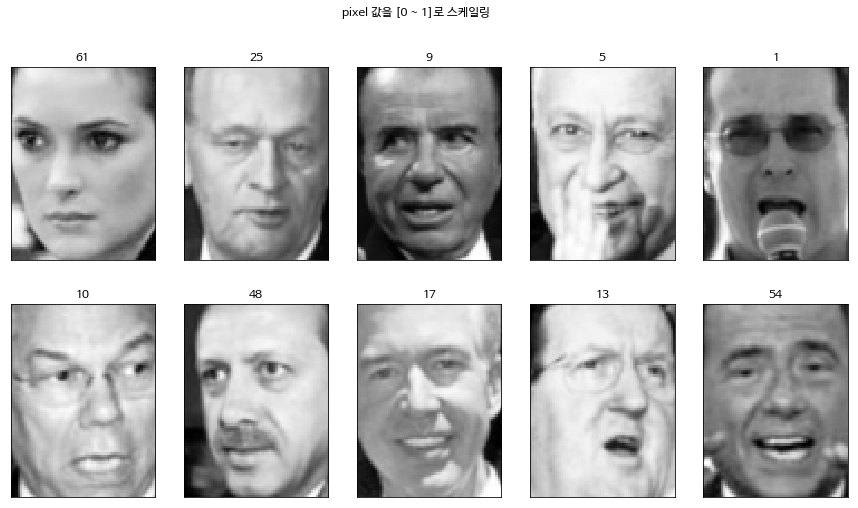

In [123]:
print('min: {} | max: {}'.format(min(X_people[0]), max(X_people[0])))

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('pixel 값을 [0 ~ 1]로 스케일링')
for target, (image, ax) in enumerate(zip(X_people, axes.ravel())):
    ax.imshow(image.reshape(image_shape), cmap='Greys_r')
    ax.set_title(y_people[target])

### 3.2 scikit-learn Classifier로 얼굴 이미지 분류
* **1-KNN**(K-NearestNeighbors Algorithm)을 이용하여 Classifier 구현

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델 생성
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


* 위의 결과와 같이, 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 방법은 좋지 않음
* 예를 들어, 픽셀을 비교할 때 얼굴의 위치가 한 픽셀만 오른쪽으로 이동해도 계산시 큰차이를 만들어 성능이 떨어지는 경우가 발생
* 따라서, **PCA**를 사용하여 주성분으로 변환한 뒤 계산하면 정확도 향상을 기대해 볼 수 있음

### 3.3 PCA에 Whitening 적용하기
* PCA의 **whitening**은 주성분(PC1, PC2...)의 스케일이 같아지도록 조정해 줌
* **whitening**은 default 값으로 PCA 변환 후 **StandardScaler**를 적용하는 것과 같은 것과 같음

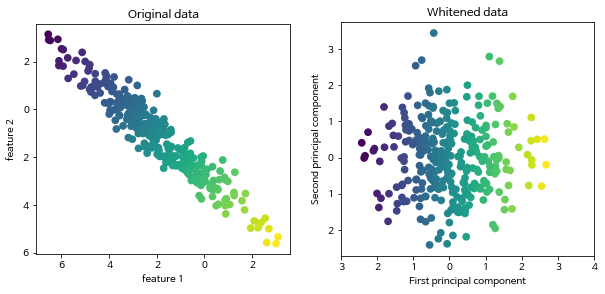

In [131]:
# PCA whitening 예시
# mglearn 패키지에 있는 예시 사용
mglearn.plots.plot_pca_whitening()

In [136]:
# 주성분: 100개, whitening: 적용
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


* **1-KNN**(K-NearestNeighbors Algorithm)을 이용하여 Classifier 구현

In [134]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


### 3.4 PCA 적용 후 eigenface(고유얼굴) 이미지로 나타내기

In [137]:
# 87 x 65 = 5655
print("pca.components_.shape: {}".format(pca.components_.shape)) 

pca.components_.shape: (100, 5655)


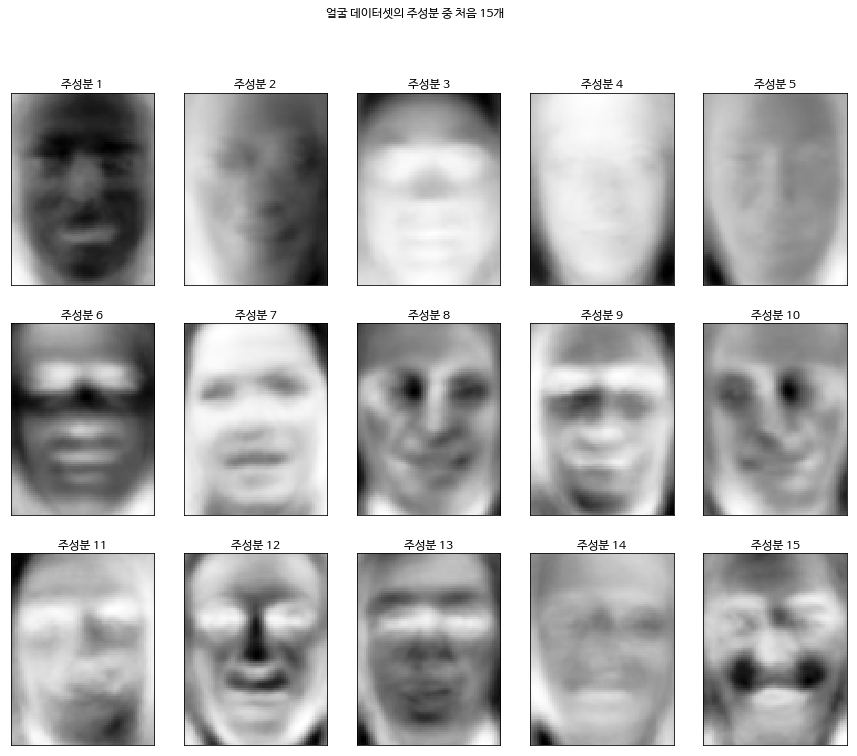

In [144]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('얼굴 데이터셋의 주성분 중 처음 15개')
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='Greys_r')
    ax.set_title("주성분 {}".format((i + 1)))

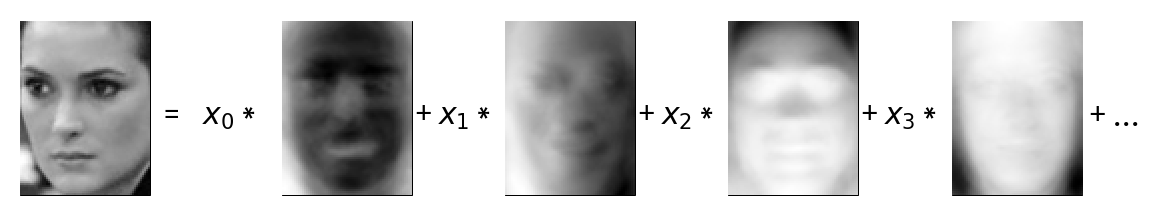

In [147]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="Greys_r")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, '$x_{}$ *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ $x_{}$ *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

### 3.5 PCA 모델 적용 후 주성분을 사용해 원본 데이터를 재구성 하기

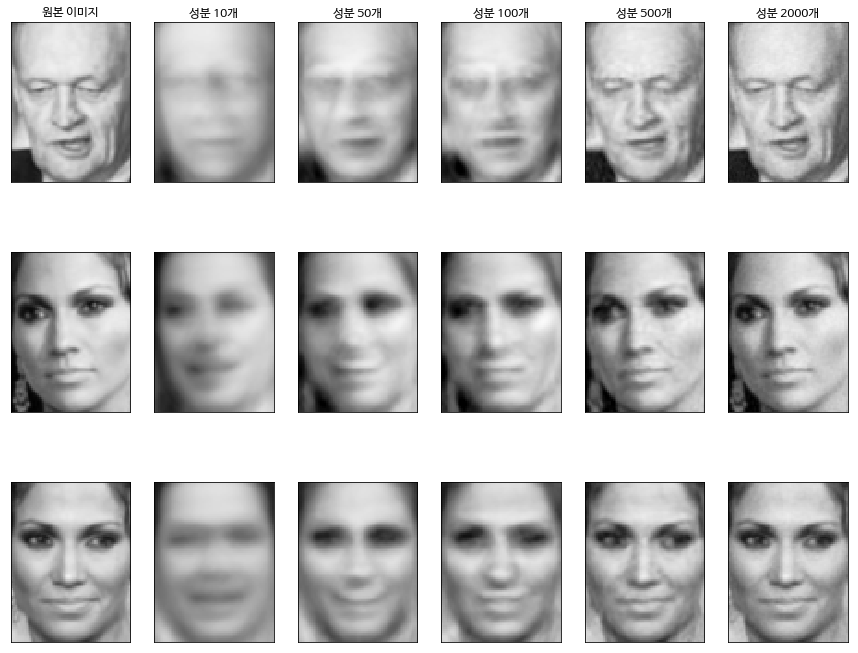

In [159]:
'''
아래의 소스코드는 mglearn 모듈에 있는 소스코드와 동일
'''
# mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
reduced_images=[]
for n_components in [10, 50, 100, 500, 2000]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_back = pca.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)

# plot the first three images in the test set:
fix, axes = plt.subplots(3, 6, figsize=(15, 12),
                            subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes):
    # plot original image
    ax[0].imshow(X_test[i].reshape(image_shape),vmin=0, vmax=1, cmap='Greys_r')
    # plot the four back-transformed images
    for a, X_test_back in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1, cmap='Greys_r')

# label the top row
axes[0, 0].set_title("원본 이미지")
for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500, 2000]):
    ax.set_title("성분 %d개" % n_components)

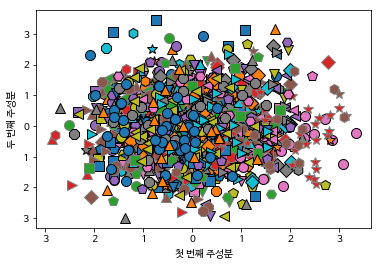

In [160]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

### 3.6 참고자료
* [Faces recognition example using eigenfaces and SVMs](http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py)